In [11]:
import pandas as pd
import json
from pprint import pprint
from collections import Counter
import string
import re
import matplotlib.pyplot as plt

### Prepare Covid Data

In [12]:
def read_file(file_name):
    '''
    This function will read the file containing tweet ids sperating by lines (in groups)
    '''
    all_ids = pd.read_table(file_name, sep='\n', header=None)
    return all_ids

In [13]:
tweet_covid = pd.read_json("../data/covid_data_prepared.json")
predict_label = pd.read_csv("../output/covid_prediction.csv")

In [14]:
tweet_covid['label'] = predict_label['Predicted']
tweet_covid['source_text'] = tweet_covid['data'].apply(lambda x: x[0]['text'].lower())

In [15]:
tweet_covid['label'].value_counts()

0    10284
1     3170
Name: label, dtype: int64

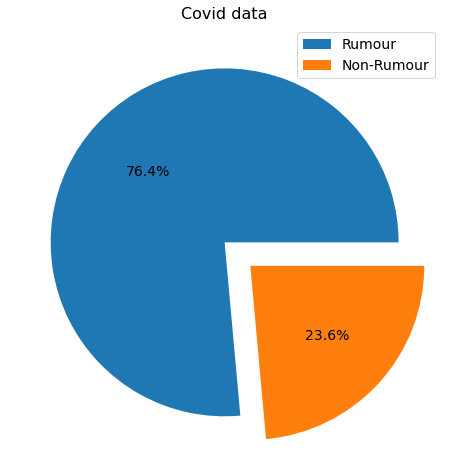

In [16]:
labels = ['Rumour', 'Non-Rumour']

tweet_covid['label'].value_counts().plot.pie(labels=['',''],
                                             explode=(0, 0.2),
                                             autopct='%1.1f%%', figsize=(8,8), fontsize=14, ylabel='')
plt.title('Covid data', fontsize=16)
plt.legend(labels, fontsize=14)

### Hashtag analysis

#### Get rumour and non-rumour hashtags

In [17]:
rumour_hashtags = []
nonrumour_hashtags = []

for i in range(len(tweet_covid)):
    if tweet_covid['label'][i] == 1:
        for word in tweet_covid['source_text'][i].split():
            if word.startswith('#'):
                # focus on english hashtags only
                index = 1
                for c in word[1:]:
                    if not re.match(r'[a-z0-9]', c):
                        word = word.replace(word[index:], '')
                    index += 1
                if(word != '#'):
                    rumour_hashtags.append(word)
    else:
        for word in tweet_covid['source_text'][i].split():
            if word.startswith('#'):
                index = 1
                for c in word[1:]:
                    if not re.match(r'[a-z0-9]', c):
                        word = word.replace(word[index:], '')
                    index += 1
                if(word != '#'):
                    nonrumour_hashtags.append(word)

rumour_hashtags = Counter(rumour_hashtags)
nonrumour_hashtags = Counter(nonrumour_hashtags)

In [18]:
print("Number of rumour hashtags:", len(rumour_hashtags))
print("Number of rumour hashtags in total:", sum(rumour_hashtags.values()))

Number of rumour hashtags: 418
Number of rumour hashtags in total: 981


In [19]:
print("Number of non-rumour hashtags:", len(nonrumour_hashtags))
print("Number of non-rumour hashtags in total:", sum(nonrumour_hashtags.values()))

Number of non-rumour hashtags: 1851
Number of non-rumour hashtags in total: 5507


##### Rumour Hashtags

In [20]:
rumour_hashtags.most_common(20)

[('#covid19', 264),
 ('#coronavirus', 142),
 ('#china', 21),
 ('#covid', 14),
 ('#txlege', 14),
 ('#breaking', 7),
 ('#lockdown', 7),
 ('#florida', 6),
 ('#coronaviruspandemic', 6),
 ('#familiesfirst', 6),
 ('#americafirst', 4),
 ('#rentrelief', 4),
 ('#youractionssavelives', 4),
 ('#iran', 4),
 ('#covidiots', 4),
 ('#1', 4),
 ('#maga', 3),
 ('#foxnews', 3),
 ('#thursdaythoughts', 3),
 ('#trump', 3)]

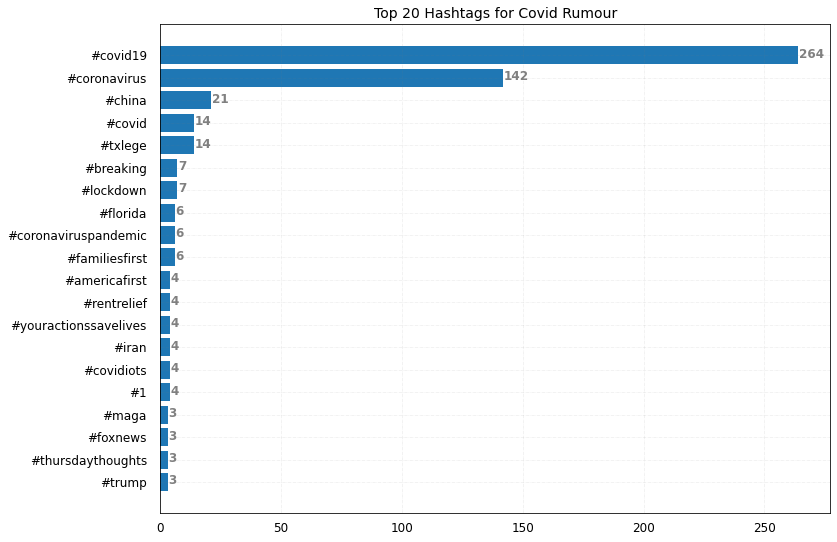

In [21]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.barh([hashtag for hashtag, count in rumour_hashtags.most_common(20)],
        [count for hashtag, count in rumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=12)
ax.yaxis.set_tick_params(pad=10, labelsize=12)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Hashtags for Covid Rumour', fontsize=14)
  
# Show Plot
plt.show()

##### Non-Rumour Hashtags

In [39]:
nonrumour_hashtags.most_common(20)

[('#covid19', 1688),
 ('#coronavirus', 795),
 ('#covid', 104),
 ('#breaking', 71),
 ('#stayhome', 31),
 ('#cdnpoli', 28),
 ('#coronaviruspandemic', 27),
 ('#stayhomesavelives', 21),
 ('#stayathome', 20),
 ('#china', 20),
 ('#socialdistancing', 19),
 ('#staysafe', 18),
 ('#lockdown', 18),
 ('#covid19ph', 18),
 ('#stayalert', 17),
 ('#indiafightscorona', 15),
 ('#sarscov2', 15),
 ('#trump', 14),
 ('#onpoli', 14),
 ('#auspol', 13)]

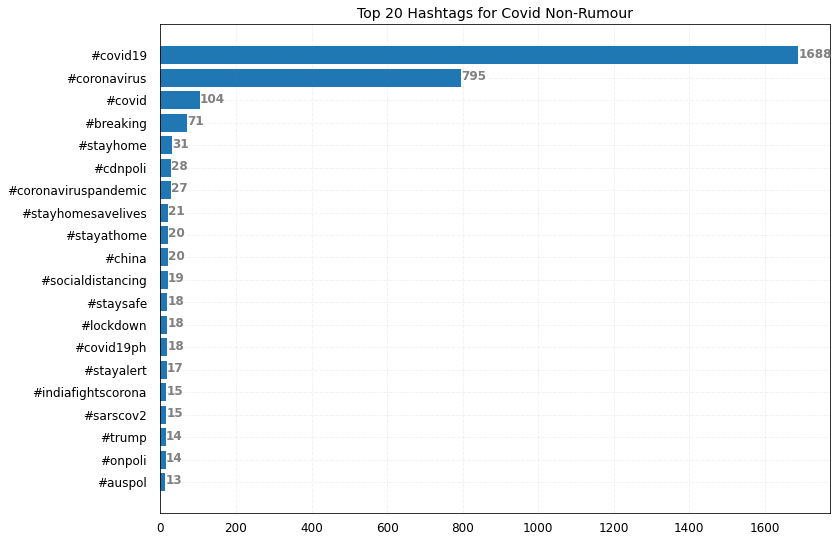

In [23]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.barh([hashtag for hashtag, count in nonrumour_hashtags.most_common(20)],
        [count for hashtag, count in nonrumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=12)
ax.yaxis.set_tick_params(pad=10, labelsize=12)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Hashtags for Covid Non-Rumour', fontsize=14)
  
# Show Plot
plt.show()

#### Common hashtags 

In [24]:
# find common hashtags and sort by frequency

common_hashtags = list(set(rumour_hashtags.keys()) & set(nonrumour_hashtags.keys()))

common_hashtags.sort(key=lambda k: rumour_hashtags[k] + nonrumour_hashtags[k], reverse=True)

print("Number of common hashtags:", len(common_hashtags))

Number of common hashtags: 152


In [43]:
common_hashtags[:20]

['#covid19',
 '#coronavirus',
 '#covid',
 '#breaking',
 '#china',
 '#coronaviruspandemic',
 '#cdnpoli',
 '#lockdown',
 '#stayathome',
 '#socialdistancing',
 '#staysafe',
 '#txlege',
 '#trump',
 '#indiafightscorona',
 '#maga',
 '#auspol',
 '#onpoli',
 '#florida',
 '#india',
 '#blacklivesmatter']

In [26]:
print("Hashtag overlap rate:",
      len(common_hashtags) /
      (len(rumour_hashtags) + len(nonrumour_hashtags) - len(common_hashtags)))

Hashtag overlap rate: 0.07179971658006613


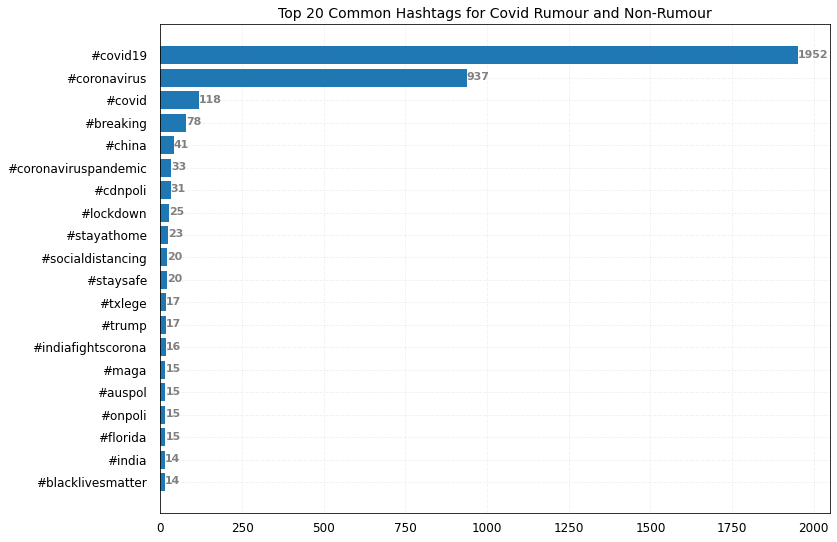

In [27]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.barh(common_hashtags[:20], [
    rumour_hashtags[k] + nonrumour_hashtags[k] for k in common_hashtags[:20]
])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=12)
ax.yaxis.set_tick_params(pad=10, labelsize=12)

# Add x, y gridlines
ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2,
             i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=11,
             fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Common Hashtags for Covid Rumour and Non-Rumour', fontsize=14)

# Show Plot
plt.show()

#### Unique hashtags

##### Unique Rumour Hashtags

In [52]:
# get rid of first 10 common keys

unique_rumour_hashtags = Counter({
    key: rumour_hashtags[key]
    for key in rumour_hashtags if key not in common_hashtags[:10]
})

In [53]:
unique_rumour_hashtags.most_common(20)

[('#txlege', 14),
 ('#florida', 6),
 ('#familiesfirst', 6),
 ('#americafirst', 4),
 ('#rentrelief', 4),
 ('#youractionssavelives', 4),
 ('#iran', 4),
 ('#covidiots', 4),
 ('#1', 4),
 ('#maga', 3),
 ('#foxnews', 3),
 ('#thursdaythoughts', 3),
 ('#trump', 3),
 ('#india', 3),
 ('#blacklivesmatter', 3),
 ('#ccpvirus', 3),
 ('#wtpteam', 3),
 ('#georgefloyd', 3),
 ('#wuhanvirus', 3),
 ('#lagov', 3)]

In [54]:
print("Number of Unique Rumour Hashtags:", len(unique_rumour_hashtags.keys()))

Number of Unique Rumour Hashtags: 408


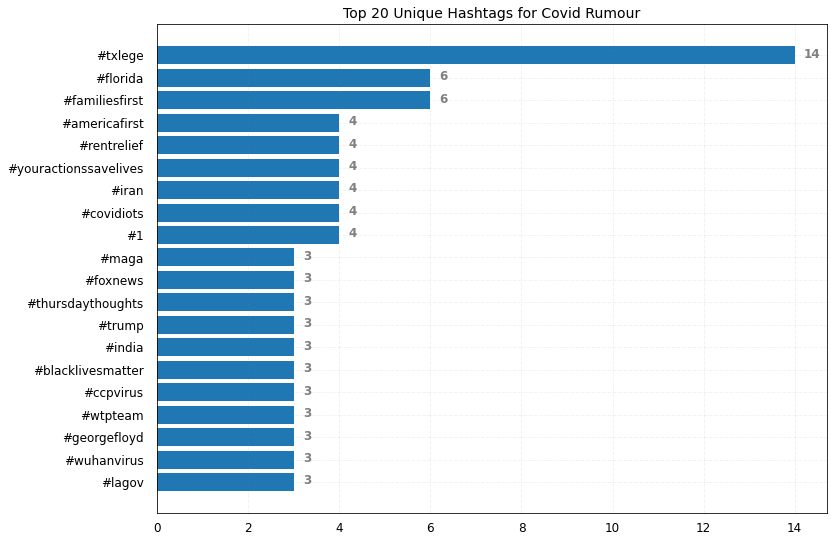

In [55]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.barh([hashtag for hashtag, count in unique_rumour_hashtags.most_common(20)],
        [count for hashtag, count in unique_rumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=12)
ax.yaxis.set_tick_params(pad=10, labelsize=12)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Unique Hashtags for Covid Rumour', fontsize=14)
  
# Show Plot
plt.show()

##### Unique Non-Rumour Hashtags

In [57]:
unique_nonrumour_hashtags = Counter({
    key: nonrumour_hashtags[key]
    for key in nonrumour_hashtags if key not in common_hashtags[:20]
})

In [58]:
unique_nonrumour_hashtags.most_common(20)

[('#stayhome', 31),
 ('#stayhomesavelives', 21),
 ('#covid19ph', 18),
 ('#stayalert', 17),
 ('#sarscov2', 15),
 ('#watch', 12),
 ('#hydroxychloroquine', 12),
 ('#coronavirussa', 12),
 ('#ridge', 11),
 ('#ppe', 11),
 ('#pandemic', 10),
 ('#takeresponsibility', 10),
 ('#corona', 9),
 ('#covid2019', 9),
 ('#nhs', 9),
 ('#covidiots', 9),
 ('#recallkatebrown', 9),
 ('#marr', 8),
 ('#gmb', 8),
 ('#coronavirusinsa', 8)]

In [36]:
print("Number of Unique Non-rumour Hashtags:", len(unique_nonrumour_hashtags.keys()))

Number of Unique Non-rumour Hashtags: 1841


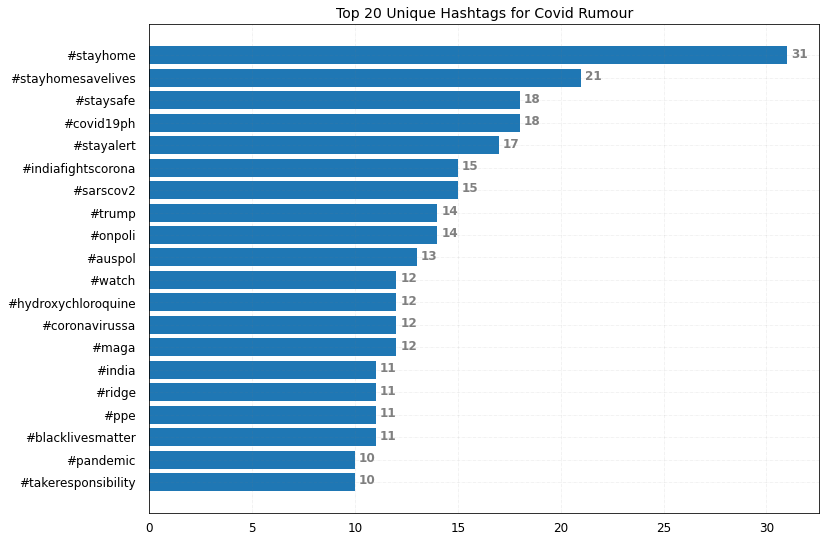

In [37]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.barh([hashtag for hashtag, count in unique_nonrumour_hashtags.most_common(20)],
        [count for hashtag, count in unique_nonrumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=12)
ax.yaxis.set_tick_params(pad=10, labelsize=12)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=12, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Unique Hashtags for Covid Rumour', fontsize=14)
  
# Show Plot
plt.show()